0.9260115610892757
-0.2621784775210767
-0.2621784775210767


*****************



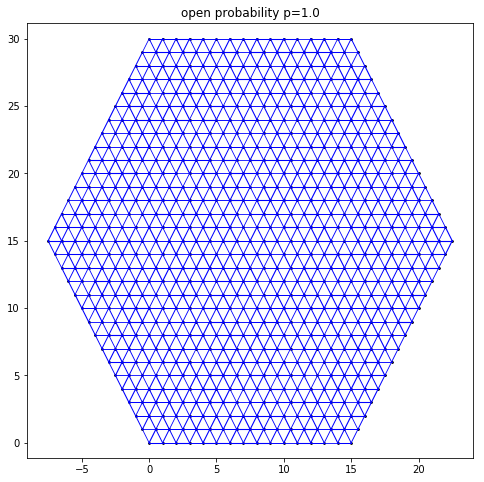

3.5187581232216214
-29.361507308774605
-1.4375639260288505e-12


*****************

3.5187581232216307
-29.361507308775018
6.715151219091777e-13


*****************

3.5187581232217067
-29.36150730877111
-4.505018924652234e-12


*****************

3.518758123221463
-29.361507308774407
1.6038128154335367e-12


*****************

3.518758123221284
-29.36150730878049
-1.0496498507514346e-12


*****************

3.5187581232216503
-29.361507308776183
9.062194363629069e-13


*****************

3.5187581232216902
-29.361507308765674
2.125377958663323e-12


*****************

3.518758123221802
-29.36150730877649
-3.2891201844970595e-12


*****************

3.518758123221492
-29.361507308772524
-3.1945865022861084e-13


*****************

3.5187581232216596
-29.36150730877472
2.001506237146752e-12


*****************



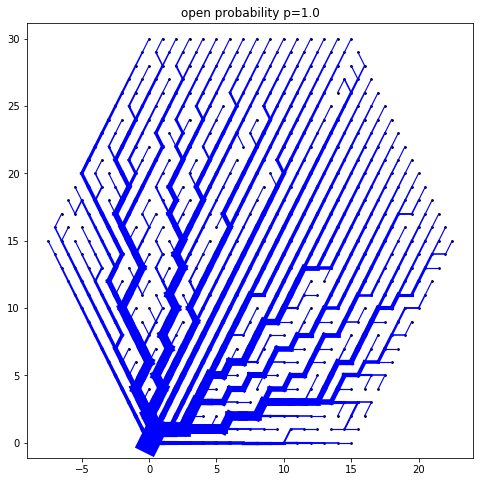

3.5187581232216165
-29.361507308783516
2.881647416348956e-12


*****************

3.5187581232216605
-29.361507308771102
4.824477574880828e-13


*****************



KeyboardInterrupt: 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

d = 0.5
p = 1.
gamma = 0.5
c0 = 1
tau_e = np.sqrt(c0*gamma)# !!! this is decided arbitrarily
c = 1# !!! this is decided arbitrarily
timestep = 500000

layers = 16
layer_nodes = np.zeros((2*layers-1),dtype = np.int64)
nodes = 3*layers**2 - 3*layers +1
network = np.zeros((nodes,12),dtype = np.float64) # P, C[3], Q_ss[3], Q_bar[3] ,x,y

source = p*(nodes-1)

C_tmp = np.zeros((nodes,3),dtype = np.float64)

for i in range(layers):
    layer_nodes[i] = 0.5*i*i+(layers-0.5)*i
for i in range(layers,2*layers-1):
    layer_nodes[i] = layer_nodes[i-1] + layers*3 - 1 - i
# plt.figure(figsize = (8,8))
# plt.axis('equal')
#initial condition: randomize C value in uniform distribution [0.5,1.5]
for i in range(nodes):
    network[i,0] = np.random.uniform(0,1)#??? initial value of P
    network[i,1:4] = np.random.uniform(1-d,1+d,3)
    #compute x,y
    network[i,-1] = np.max(np.where(layer_nodes<i+1))
    network[i,-2] = i - layer_nodes[np.max(np.where(layer_nodes<i+1))]
    x = network[i,-2]
    y = network[i,-1]
    
    #plot conductivity
#     if y < layers-1 and x 

for t in range(timestep):
    
    # #energy of the network:
    if np.mod(t,100) == 0:
        print(network[0,0])
        print(c*(-tau_e**2)*network[0,1])
        print(c*(network[0,4]**2/network[0,1]**(gamma+1)-tau_e**2)*network[0,1])
        print('\n')
        print('*****************\n')
    
    if np.mod(t,1000) == 0:    
        g=plt.figure(figsize = (8,8))
        plt.axis('equal')
        for i in range(nodes):
            x = np.int64(network[i,-2])
            y = np.int64(network[i,-1])
            #plot conductivity
            #plot conductivity
            if y < layers-1 and x < layers+y-1:
                if network[i,3]>0.0000001:
                    plt.plot([x-0.5*y,x-0.5*y+1],[y,y],linewidth =network[i,3]**(1./3),c = 'b')
                # plt.text((x-0.5*y)*0.5+(x-0.5*y+1)*0.5,y,str("%.1f"%network[i,3]))
                if network[i,2]>0.0000001:
                    plt.plot([x-0.5*y,x-0.5*y+0.5],[y,y+1],linewidth =network[i,2]**(1./3),c = 'b')
                # plt.text((x-0.5*y)*0.5+(x-0.5*y+0.5)*0.5,y+0.5,str("%.1f"%network[i,2]))
                if network[i,1]>0.0000001:
                    plt.plot([x-0.5*y,x-0.5*y-0.5],[y,y+1],linewidth =network[i,1]**(1./3),c = 'b')
                # plt.text((x-0.5*y)*0.5+(x-0.5*y-0.5)*0.5,y+0.5,str("%.1f"%network[i,1]))
            elif y<layers-1 and x > layers+y-2:
                if network[i,2]>0.0000001:
                    plt.plot([x-0.5*y,x-0.5*y+0.5],[y,y+1],linewidth =network[i,2]**(1./3),c = 'b')
                # plt.text((x-0.5*y)*0.5+(x-0.5*y+0.5)*0.5,y+0.5,str("%.1f"%network[i,2]))
                if network[i,1]>0.0000001:
                    plt.plot([x-0.5*y,x-0.5*y-0.5],[y,y+1],linewidth =network[i,1]**(1./3),c = 'b')
                # plt.text((x-0.5*y)*0.5+(x-0.5*y-0.5)*0.5,y+0.5,str("%.1f"%network[i,1]))
            elif y>layers-2 and y<2*layers-2 and x>0 and x < 3*layers - 2 - y-1:
                if network[i,3]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1+1],[y,y],linewidth =network[i,3]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1+1)*0.5,y,str("%.1f"%network[i,3]))
                if network[i,2]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1+0.5],[y,y+1],linewidth =network[i,2]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1+0.5)*0.5,y+0.5,str("%.1f"%network[i,2]))
                if network[i,1]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1-0.5],[y,y+1],linewidth =network[i,1]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1-0.5)*0.5,y+0.5,str("%.1f"%network[i,3]))
            elif y>layers-2 and y<2*layers-2 and x<1:
                if network[i,3]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1+1],[y,y],linewidth =network[i,3]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1+1)*0.5,y,str("%.1f"%network[i,3]))
                if network[i,2]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1+0.5],[y,y+1],linewidth =network[i,2]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1+0.5)*0.5,y+0.5,str("%.1f"%network[i,3]))
            elif y>layers-2 and y<2*layers-2 and x>3*layers - 2 - y-2:
                if network[i,1]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1-0.5],[y,y+1],linewidth =network[i,1]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1-0.5)*0.5,y+0.5,str("%.1f"%network[i,1]))
            elif y>2*layers-3 and x<layers-1:
                if network[i,3]>0.0000001:
                    plt.plot([x+ 0.5*y - layers+1,x + 0.5*y - layers+1+1],[y,y],linewidth =network[i,3]**(1./3),c = 'b')
                # plt.text((x+ 0.5*y - layers+1)*0.5+(x + 0.5*y - layers+1+1)*0.5,y,str("%.1f"%network[i,3]))
            #plot nodes
            if y<layers:
                plt.scatter(x - 0.5*y,y,c = 'k',s = 3)
            else:
                plt.scatter(x + 0.5*y - layers+1,y,c ='k',s = 3)
        plt.title('open probability p='+str(p))
        plt.savefig('after '+str(t)+' time steps.eps')
        plt.show()
#single sink state, use C to compute P

    P_matrix = np.zeros((nodes,nodes),dtype = np.float64)
    s = np.zeros((nodes),dtype = np.float64)
    
    for j in range(nodes):
        if np.random.rand()<p:
            s[j] = 1
    s[0] = -1*source
    #write each element of the matrix
    
    for j in range(nodes):
        x = np.int64(network[j,-2])
        y = np.int64(network[j,-1])
        if y < layers-1 and x < layers+y-1:

            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x+1
            n1 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x



            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,1]
            P_matrix[n0,n1] = P_matrix[n0,n1] + network[n0,1]

            P_matrix[n1,n0] = P_matrix[n1,n0] + network[n0,1]
            P_matrix[n1,n1] = P_matrix[n1,n1] - network[n0,1]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,2]
            P_matrix[n0,n2] = P_matrix[n0,n2] + network[n0,2]

            P_matrix[n2,n0] = P_matrix[n2,n0] + network[n0,2]
            P_matrix[n2,n2] = P_matrix[n2,n2] - network[n0,2]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,3]
            P_matrix[n0,n3] = P_matrix[n0,n3] + network[n0,3]

            P_matrix[n3,n0] = P_matrix[n3,n0] + network[n0,3]
            P_matrix[n3,n3] = P_matrix[n3,n3] - network[n0,3]

        elif y<layers-1 and x > layers+y-2:

            n2 = layer_nodes[np.int64(y+1)] + x+1
            n1 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,1]
            P_matrix[n0,n1] = P_matrix[n0,n1] + network[n0,1]

            P_matrix[n1,n0] = P_matrix[n1,n0] + network[n0,1]
            P_matrix[n1,n1] = P_matrix[n1,n1] - network[n0,1]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,2]
            P_matrix[n0,n2] = P_matrix[n0,n2] + network[n0,2]

            P_matrix[n2,n0] = P_matrix[n2,n0] + network[n0,2]
            P_matrix[n2,n2] = P_matrix[n2,n2] - network[n0,2]

        elif y>layers-2 and y<2*layers-2 and x>0 and x < 3*layers - 2 - y-1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x
            n1 = layer_nodes[np.int64(y+1)] + x-1
            n0 = layer_nodes[np.int64(y)] + x

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,1]
            P_matrix[n0,n1] = P_matrix[n0,n1] + network[n0,1]

            P_matrix[n1,n0] = P_matrix[n1,n0] + network[n0,1]
            P_matrix[n1,n1] = P_matrix[n1,n1] - network[n0,1]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,2]
            P_matrix[n0,n2] = P_matrix[n0,n2] + network[n0,2]

            P_matrix[n2,n0] = P_matrix[n2,n0] + network[n0,2]
            P_matrix[n2,n2] = P_matrix[n2,n2] - network[n0,2]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,3]
            P_matrix[n0,n3] = P_matrix[n0,n3] + network[n0,3]

            P_matrix[n3,n0] = P_matrix[n3,n0] + network[n0,3]
            P_matrix[n3,n3] = P_matrix[n3,n3] - network[n0,3]

        elif y>layers-2 and y<2*layers-2 and x<1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,2]
            P_matrix[n0,n2] = P_matrix[n0,n2] + network[n0,2]

            P_matrix[n2,n0] = P_matrix[n2,n0] + network[n0,2]
            P_matrix[n2,n2] = P_matrix[n2,n2] - network[n0,2]

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,3]
            P_matrix[n0,n3] = P_matrix[n0,n3] + network[n0,3]

            P_matrix[n3,n0] = P_matrix[n3,n0] + network[n0,3]
            P_matrix[n3,n3] = P_matrix[n3,n3] - network[n0,3]
        elif y>layers-2 and y<2*layers-2 and x>3*layers - 2 - y-2:
            n1 = layer_nodes[np.int64(y+1)] + x-1
            n0 = layer_nodes[np.int64(y)] + x

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,1]
            P_matrix[n0,n1] = P_matrix[n0,n1] + network[n0,1]

            P_matrix[n1,n0] = P_matrix[n1,n0] + network[n0,1]
            P_matrix[n1,n1] = P_matrix[n1,n1] - network[n0,1]

        elif y>2*layers-3 and x<layers-1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n0 = layer_nodes[np.int64(y)] + x

            P_matrix[n0,n0] = P_matrix[n0,n0] - network[n0,3]
            P_matrix[n0,n3] = P_matrix[n0,n3] + network[n0,3]

            P_matrix[n3,n0] = P_matrix[n3,n0] + network[n0,3]
            P_matrix[n3,n3] = P_matrix[n3,n3] - network[n0,3]
    # print P_matrix
    #solve this matrix to get P
    network[:,0] = np.dot(np.linalg.pinv(P_matrix),s)
        
        
        #calculate Q_i
    for j in range(nodes):
        x = np.int64(network[j,-2])
        y = np.int64(network[j,-1])
        if y < layers-1 and x < layers+y-1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x+1
            n1 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x

            
            network[n0,6] = ((network[n3,0]-network[n0,0])*network[n0,3])
            network[n0,5] = ((network[n2,0]-network[n0,0])*network[n0,2])
            network[n0,4] = ((network[n1,0]-network[n0,0])*network[n0,1])

        elif y<layers-1 and x > layers+y-2:

            n2 = layer_nodes[np.int64(y+1)] + x+1
            n1 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x

            network[n0,5] = ((network[n2,0]-network[n0,0])*network[n0,2])
            network[n0,4] = ((network[n1,0]-network[n0,0])*network[n0,1])

        elif y>layers-2 and y<2*layers-2 and x>0 and x < 3*layers - 2 - y-1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x
            n1 = layer_nodes[np.int64(y+1)] + x-1
            n0 = layer_nodes[np.int64(y)] + x

            network[n0,6] = ((network[n3,0]-network[n0,0])*network[n0,3])
            network[n0,5] = ((network[n2,0]-network[n0,0])*network[n0,2])
            network[n0,4] = ((network[n1,0]-network[n0,0])*network[n0,1])

        elif y>layers-2 and y<2*layers-2 and x<1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n2 = layer_nodes[np.int64(y+1)] + x
            n0 = layer_nodes[np.int64(y)] + x
            network[n0,6] = ((network[n3,0]-network[n0,0])*network[n0,3])
            network[n0,5] = ((network[n2,0]-network[n0,0])*network[n0,2])
        elif y>layers-2 and y<2*layers-2 and x>3*layers - 2 - y-2:
            n1 = layer_nodes[np.int64(y+1)] + x-1
            n0 = layer_nodes[np.int64(y)] + x
            network[n0,4] = ((network[n1,0]-network[n0,0])*network[n0,1])

        elif y>2*layers-3 and x<layers-1:
            n3 = layer_nodes[np.int64(y)] + x+1
            n0 = layer_nodes[np.int64(y)] + x
            network[n0,6] = ((network[n3,0]-network[n0,0])*network[n0,3])

    #update C,  use 4th order Runge-Kutta ??? 
    #use forward-Euler method
    # print(network[0,:])
    # print(c*(-tau_e**2)*network[0,1])
    # print(c*((network[0,4]**2)/network[0,1]**(gamma+1)-tau_e**2)*network[0,1])
    # print('\n')
    # print(network[1,:])
    # print(np.sum(network[:,4]**2/network[:,1]+c0*network[:,1]**(gamma+1)+network[:,5]**2/network[:,2]+c0*network[:,2]**(gamma+1)+network[:,6]**2/network[:,3]+c0*network[:,3]**(gamma+1)))
    
    for i in range(nodes):
        for k in range(1,4):
            if network[i,k]<1e-20:
                network[i,k] =0
            elif network[i,k+3]**2<1e-40:
                tmp = network[i,k] - c*tau_e**2*network[i,k]
                network[i,k] = tmp
            else:
                tmp = network[i,k] + c*((network[i,k+3]**2)/network[i,k]**(gamma+1)-tau_e**2)*network[i,k]
                network[i,k] = tmp
    # print(network[0,:])
    # print(c*(-tau_e**2)*network[0,1])
    # print(c*(network[0,4]**2/network[0,1]**(gamma+1)-tau_e**2)*network[0,1])
    # print('\n')
    # print('*****************\n')
    # print (np.min(network[:,1:4]))